Data saved to clean_covid_data.csv
  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04         

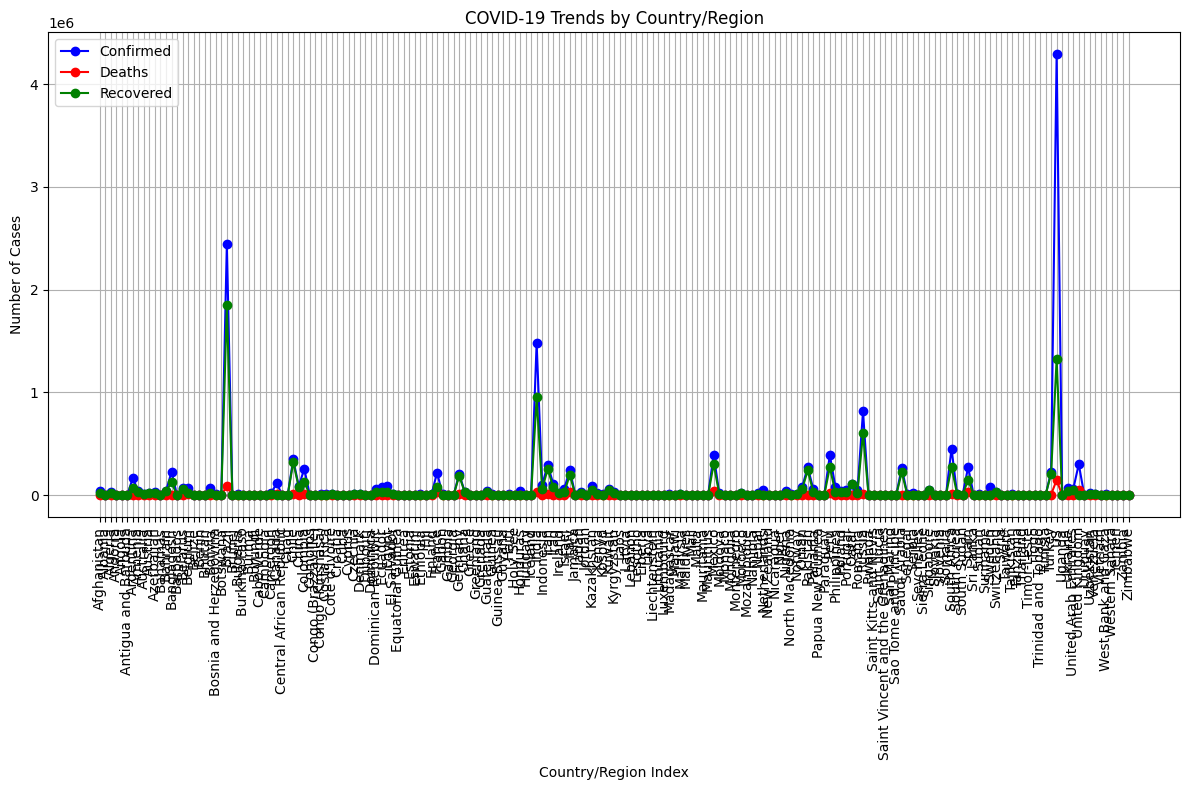

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data_cleaning import load_and_clean_data
from file_handling import save_cleaned_data, load_cleaned_data
from xception import DataCleaningError, FileHandlingError

# Directly calling the data cleaning function and saving the result
try:
    cleaned_data = load_and_clean_data()
    save_cleaned_data(cleaned_data)
except DataCleaningError as e:
    print(e)

# Example of loading the cleaned data
try:
    df = load_cleaned_data()
    print(df.head())
except FileHandlingError as e:
    print(e)

# Perform basic analysis using pandas operations
try:
    df = load_cleaned_data()

    # Calculate total cases
    total_confirmed = df['Confirmed'].sum()
    total_deaths = df['Deaths'].sum()
    total_recovered = df['Recovered'].sum()

    print(f"Total Confirmed Cases: {total_confirmed}")
    print(f"Total Deaths: {total_deaths}")
    print(f"Total Recovered: {total_recovered}")

    # Identify countries with the highest and lowest cases
    highest_confirmed = df.loc[df['Confirmed'].idxmax()]
    lowest_confirmed = df.loc[df['Confirmed'].idxmin()]

    print(f"\nCountry with Highest Confirmed Cases: {highest_confirmed['Country/Region']}")
    print(f"Confirmed Cases: {highest_confirmed['Confirmed']}")
    
    print(f"\nCountry with Lowest Confirmed Cases: {lowest_confirmed['Country/Region']}")
    print(f"Confirmed Cases: {lowest_confirmed['Confirmed']}")

    # Visualize trends without using 'Date' column
    num_countries = len(df)
    index = np.arange(num_countries)  # Generate sequential index
    
    # Plot trends
    plt.figure(figsize=(12, 8))
    plt.plot(index, df['Confirmed'], marker='o', linestyle='-', color='blue', label='Confirmed')
    plt.plot(index, df['Deaths'], marker='o', linestyle='-', color='red', label='Deaths')
    plt.plot(index, df['Recovered'], marker='o', linestyle='-', color='green', label='Recovered')
    
    plt.title('COVID-19 Trends by Country/Region')
    plt.xlabel('Country/Region Index')
    plt.ylabel('Number of Cases')
    plt.xticks(index, df['Country/Region'], rotation=90)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

except FileHandlingError as e:
    print(e)
except Exception as e:
    print(f"An unexpected error occurred: {e}")
